<a href="https://colab.research.google.com/github/JenSeoul/AsyncJS_Promises/blob/main/n211a_simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

# Linear Regression

이번 모듈에서 사용한 데이터와 유사한 데이터를 사용해 복습해 보겠습니다. 이 데이터셋은 미국 시애틀 King County 지역에서 2014년 5월부터 ~ 2015년 5월 까지 주택 판매 가격 데이터입니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)


이 데이터를 사용해 다음 과제를 마크다운과 코드를 사용해 진행해 주세요.

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn 

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')


In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### 1) 특성들과 타겟(Price)과의 상관계수를 계산하고 가장 상관관계가 높은 특성을 찾아 타겟과의 관계를 시각화 하세요.
- **타겟과 상관관계가 가장 높은 특성의 이름을 과제 제출폼에 제출하세요.**

In [ ]:
#서열척도: grade, condition
#명목척도: zipcode, 
#등간척도: yearbuilt, renovated ,lat,long

In [117]:
### 이곳에서 과제를 진행해 주세요 ###
import scipy.stats

r_lst = []
df_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15']

spearman_lst = []
df_scols = ['condition', 'grade','yr_built', 'yr_renovated','lat', 'long']

#corrcoef for ratio scaled features 
for col in df_cols:
  r = np.corrcoef(df['price'], df[col])[0,1]
  r_lst.append(r)

#spearman 
for col2 in df_scols:
  r2 = scipy.stats.spearmanr(df['price'], df[col2]).correlation
  spearman_lst.append(r2)

maxr = max(abs(np.array(r_lst)))
ind = r_lst.index(maxr)
name = df_cols[ind]

maxr2 = max(abs(np.array(spearman_lst))) 
ind2 = spearman_lst.index(maxr2)
name2 = df_scols[ind2]

print(maxr)
print(name)
print('\n')
print(maxr2)
print(name2)

0.7020350546118003
sqft_living


0.6582152214259375
grade


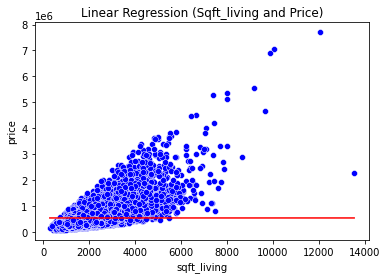

In [119]:
#시각화 (평균기준모델 seaborn)
x = df['sqft_living']
y = df['price']

predict = y.mean()
errors =  predict - df['price']
mean_abs_errors1 = errors.abs().mean()

plt.title('Linear Regression (Sqft_living and Price)')
sns.lineplot(x=x,y=predict,color='red')
sns.scatterplot(x=x,y=y,color='blue')
plt.show()

In [120]:
#시각화(평균기준모델)
#import plotly.express as px
#mean_abs_errors = errors.abs().mean()
#
#fig = px.scatter(df, x='sqft_living', y='price',title='Linear Regression (Sqft_living and Price)')
#fig.add_shape(type='line',
#                x0=0,
#                y0=540088,
#                x1=14000,
#                y1=540088,
#                line=dict(color='Red'),
#                xref='x',
#                yref='y'
#)
#fig.show()

### 2) grade 와 price의 scatter plot을 그리고 기준모델을 시각화 해 보세요.
- **기준모델의 값을 과제 제출폼에 제출하세요.**

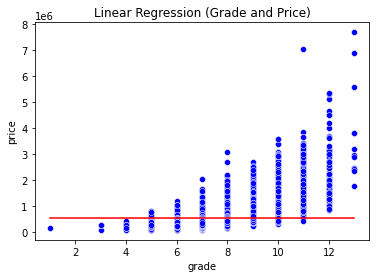

In [118]:
### 이곳에서 과제를 진행해 주세요 ###
#시각화
x1 = df['grade']
y1 = df['price']

predict1 = y1.mean()
errors1 =  predict1 - df['price']
mean_abs_errors1 = errors1.abs().mean()

plt.title('Linear Regression (Grade and Price)')
sns.lineplot(x=x1,y=predict1,color='red')
sns.scatterplot(x=x1,y=y1,color='blue')
plt.show()

In [ ]:
#기준모델의 값
print(f'예측한 주택 가격이 ${predict1:,.0f}이며 절대평균에러가 ${mean_abs_errors1:,.0f}임을 확인할 수 있습니다.')

예측한 주택 가격이 $540,088이며 절대평균에러가 $233,942임을 확인할 수 있습니다.


### 3) Scikit-Learn 라이브러리를 사용해 특성 grade에 대한 선형회귀모델을 만들어 보세요.
- **grade 값이 6인 경우에 모델이 예측하는 주택 가격을 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
from sklearn.linear_model import LinearRegression

## 예측모델 인스턴스를 만듭니다
model = LinearRegression()

## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [108]:
## 모델을 학습(fit)합니다
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
## grade가 6인샘플을 선택해 학습한 모델을 통해 예측해 봅니다
X_test = [[6]]
y_pred = model.predict(X_test)
gr_pred_price = y_pred 

print(f'Grade {X_test[0][0]}를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

Grade 6를 가지는 주택의 예상 가격은 $194700 입니다.


In [ ]:
## 기존에 없는 샘플을 예측해보고자 합니다
#df['grade'].unique() 를 통해 없는 값 확인 ->14
#gr_pri_nex = model.predict([[14]])
#result = 1862360.89740753

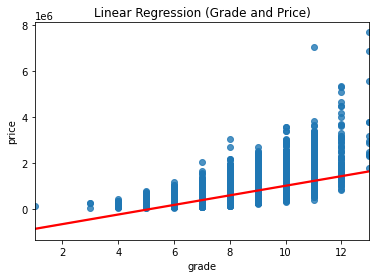

In [ ]:
sns.regplot(x=df['grade'],y=df['price'],line_kws={"color": "red"})

plt.title('Linear Regression (Grade and Price)')
plt.show()


### 4) 만든 모델을 사용해 새로운 데이터에 대해 예측을 해 보고 coefficient를 사용해 설명해 보세요.
- **grade 특성에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
#계수(coeff)
grade_coef = model.coef_

#절편(intercept)
grade_intercept = model.intercept_

print(float(grade_coef))
print(float(grade_intercept))

280.62356789744825
-43580.74309447396


In [ ]:
#새로운 데이터에 대해 예측, grade가 8인 경우! 
X_test1 = [[8]]
y_pred1 = model.predict(X_test1)

print(f'Grade {X_test1[0][0]}를 가지는 주택의 예상 가격은 ${int(y_pred1)} 입니다.')

Grade 8를 가지는 주택의 예상 가격은 $611615 입니다.


In [ ]:
#Explanation
print(f'회귀선의 기울기(coefficient)는 {float(grade_coef)}이고 intercept는 {float(grade_intercept)}이므로,\n회귀식은 y(주택예상가격) = 280.6*x(grade) - 43581 ')

회귀선의 기울기(coefficient)는 280.62356789744825이고 intercept는 -43580.74309447396이므로,
회귀식은 y(주택예상가격) = 280.6*x(grade) - 43581 


### 5) sqft_living 특성을 사용하여 모델을 만들어 보고 두 모델을 비교해 보세요.
- **sqft_living에 대한 회귀계수를 과제 제출폼에 제출하세요.**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###
#feature data 와 target data 준비 
feature_sq = ['sqft_living'] 
target_pr = ['price']

X_train_sq = df[feature_sq]
Y_train_sq = df[target_pr]

In [ ]:
## 예측모델 인스턴스를 만듭니다
model2 = LinearRegression()

#model 학습시킵니다
model2.fit(X_train_sq,Y_train_sq)

#coefficient 회귀계수 
sqft_r = model2.coef_
print(sqft_r)

#intercept
sqft_inter = model2.intercept_
print(sqft_inter)

[[280.6235679]]
[-43580.74309447]


In [ ]:
## 새로운 데이터 한 샘플을 선택해 학습한 모델을 통해 예측해 봅니다
sample = int(df['sqft_living'].sample(1,random_state=42).values)
print(f'sample_sqft_living:{sample}')

X_test_sq = [[sample]]
y_pred_pr = model2.predict(X_test_sq)

print(f'{X_test_sq[0][0]} sqft_living인 주택의 예상 가격은 ${int(y_pred_pr)} 입니다.')

sample_sqft_living:2070
2070 sqft_living인 주택의 예상 가격은 $537310 입니다.


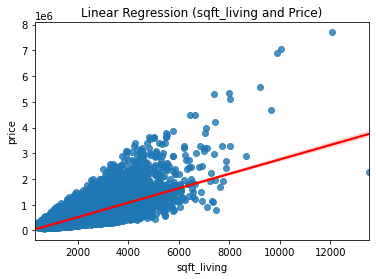

In [121]:
sns.regplot(x=df['sqft_living'],y=df['price'],line_kws={"color": "red"})

plt.title('Linear Regression (sqft_living and Price)')
plt.show()


In [122]:
#fig = px.scatter(
#    df, x='sqft_living', y='price', opacity=0.65,
#    trendline='ols', trendline_color_override='red',
#    title='Linear Regression (Sqft_living and Price)'
#)
#fig.show()

## 🔥도전과제

### 6) 단순선형회귀모델을 만들기 위한 좋은 특성을 선택하기 위해 고려해야 하는 사항들에 대해 조사하고 서술하세요.

### 7) OLS에 대해서 검색해 보고 본인의 이해를 녹여내어 10문장 내로 요약해 보세요.

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

#simple linear regression model을 만들기 위한 좋은 특성

print('특성: 예측하고자 하는 종속변수(y)와 독립변수(x)간에 선형적 상관관계가 있어야 합니다.\n선형성의 측정: 피쳐간의 상관계수를 측정하는 방법으로 numpy.corrcoef 를 통해 구할 수 있습니다.')
print('\n')
print('OLS: 어떤 데이터가 주어졌을 때 최적의 추세선을 그리기 위한 방법 중 하나가 최소자승법이라 할 수 있습니다.') 
print('Ordinary Least Square를 그리는 방법은 예측한 y값과 실제 y값의 차이(error 혹은 residual) 를 제곱하여 합한 값이 최소가 되는 선을 만드는 것입니다.')
print('최소자승법을 활용하여 데이터(x,y의관계)를 가장 잘 표현하는 선형 회귀선을 그릴 수 있습니다.')

특성: 예측하고자 하는 종속변수(y)와 독립변수(x)간에 선형적 상관관계가 있어야 합니다.
선형성의 측정: 피쳐간의 상관계수를 측정하는 방법으로 numpy.corrcoef 를 통해 구할 수 있습니다.


OLS: 어떤 데이터가 주어졌을 때 최적의 추세선을 그리기 위한 방법 중 하나가 최소자승법이라 할 수 있습니다.
Ordinary Least Square를 그리는 방법은 예측한 y값과 실제 y값의 차이(error 혹은 residual) 를 제곱하여 합한 값이 최소가 되는 선을 만드는 것입니다.
최소자승법을 활용하여 데이터(x,y의관계)를 가장 잘 표현하는 선형 회귀선을 그릴 수 있습니다.


## OLS 실습 

In [ ]:
import statsmodels.api as sm

#OLS summary(sqft_living) : intercept라는 컬럼을 추가해야 다음 프로세스 진행가능하다고 합니다...?
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'sqft_living']])

results1 = lm.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:08:13   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
##OLS summary(grade) 
df['intercept'] = 1
lm2 = sm.OLS(df['price'], df[['intercept', 'grade']])

results2 = lm2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        06:14:57   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.056e+06   1.23e+04    -86.166      0.000   -1.08e+06   -1.03e+06
grade       2.085e+05   1582.103    131.760      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    19920.375   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2053087.758
Skew:                           4.090   Prob(JB):                         0.00
Kurtosis:                      50.042   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""